In [1]:
# import things

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.checkpoint import checkpoint
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Make Data
N_dat   = 100000
X_intercept = np.random.uniform(-30,30,N_dat)# in degrees
cosTheta    = np.random.uniform(-0.9,0.9,N_dat)

m = np.tan(np.arccos(cosTheta))
b = X_intercept*m 

(1.6, 30.4)

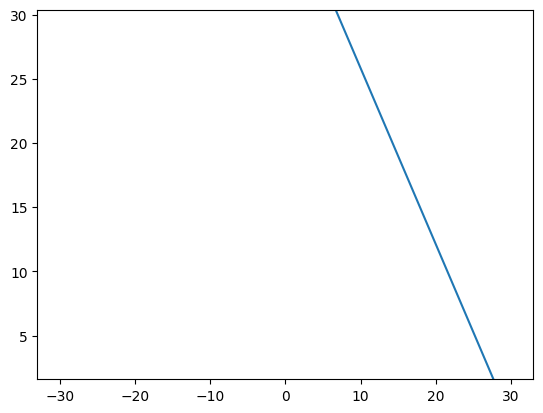

In [3]:
x = np.linspace(min(X_intercept),max(X_intercept),N_dat)
i = np.random.randint(N_dat)

y = m[i]*x + b[i]

plt.plot(x,y)
plt.ylim(1.6,30.4)

In [4]:
grid_rows,grid_cols = 22,20
grid_size = 1.5
grid_centre_x,grid_centre_y = 0,16.8
Grid = np.zeros((N_dat,grid_rows,grid_cols))

grid_row_edges = np.linspace(1.6,30.4,grid_rows+1)
grid_col_edges = np.linspace(-15,15,grid_cols+1)
print(grid_col_edges)

for k,(m_val,b_val) in enumerate(zip(m,b)):
    for i,(y1,y2) in enumerate(zip(grid_row_edges[:-1],grid_row_edges[1:])):
        for j,(x1,x2) in enumerate(zip(grid_col_edges[:-1],grid_col_edges[1:])):
            line1 = m_val*x1 + b_val
            line2 = m_val*x2 + b_val
            if ((line1-y1)*(line2-y2) <= 0) or ((line1-y2)*(line2-y1) <= 0):
                Grid[k,i,j] = 1

[-15.  -13.5 -12.  -10.5  -9.   -7.5  -6.   -4.5  -3.   -1.5   0.    1.5
   3.    4.5   6.    7.5   9.   10.5  12.   13.5  15. ]


27066
34.0
[-15.0, 15.0, 1.6, 30.4]
31.783745980792176
0.6196335937248301


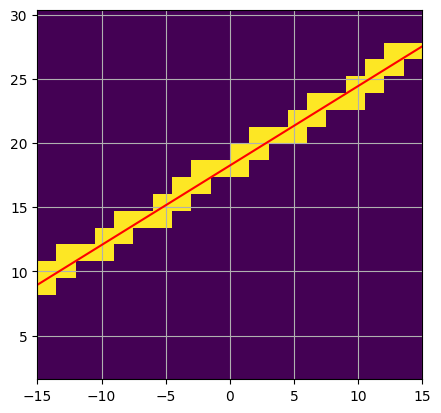

In [5]:
while True:
    n = np.random.randint(N_dat)
    if np.sum(Grid[n]) > 5:
        print(n)
        print(np.sum(Grid[n]))
        # print(Grid[n])
        break
# Plot grid
fig, ax = plt.subplots()
ax.set_aspect('equal','box')
ax.set_ylim(1.6,30.4)
ax.set_xlim(-15,15)


extent = [grid_col_edges[0], grid_col_edges[-1], grid_row_edges[0], grid_row_edges[-1]]
ax.imshow(Grid[n],origin = 'lower',extent=extent)
print(extent)
X = np.linspace(-15,15)
Y = m[n]*(X) + b[n]
plt.plot(X,Y,'r')
plt.grid()
# plt.ylim(0,22)
# # plt.xlim(0,20)
print(np.arctan(m[n])/np.pi*180)
print(m[n])

In [6]:
Data = Grid[Grid.sum(axis=(1,2))>5]
print(Data.shape)
TrueX = np.sqrt(1/(1+m**2))
TrueY = m*TrueX

Data = torch.from_numpy(Data).float()
TrueX = torch.from_numpy(TrueX).float()
TrueY = torch.from_numpy(TrueY).float()
Truth = torch.stack((TrueX,TrueY),dim=1)

(61549, 22, 20)


In [7]:
# class MyDataset(torch.utils.data.Dataset):
#     def __init__(self, Main, Truth):
#         self.Main = Main.unsqueeze(1)
#         self.Truth = Truth
#     def __len__(self):
#         return len(self.Main)
#     def __getitem__(self, idx):
#         return self.Main[idx,:,:,:], self.Truth[idx,:]
    
# DataSet = MyDataset(Data,Truth)

In [8]:
# def Loss(Pred,Truth):
#     criterion = nn.MSELoss()
#     return criterion(Pred,Truth)

In [9]:
# class ModelXY(nn.Module):
#     def __init__(self):
#         super(ModelXY, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 5, stride = 1 ,padding=(1,2)) # Should Return a 20x20 with this padding
#         self.conv2 = nn.Conv2d(32, 32, 5, stride = 1 ,padding=2) # Should Return a 20x20 with this padding
#         self.MaxPool= nn.MaxPool2d(2, stride=2) # Should Return a 10x10
#         self.conv3 = nn.Conv2d(32,32,3,stride=1,padding=1) # Should Return a 10x10

#         self.Dense1 = nn.Linear(32*100, 32*2)
#         self.Dense2 = nn.Linear(32*2, 32*2)
#         self.Dense3 = nn.Linear(32*2, 2)

#         self.Activation = nn.ReLU()
#         self.FinalActivation = nn.Tanh()
#         # Weight Initialization

#     def forward(self, x):
#         x = self.Activation(self.conv1(x))
#         x = self.Activation(self.conv2(x))
#         x = self.MaxPool(x)
#         x = self.Activation(self.conv3(x))

#         # Reshape

#         x = x.view(-1, 32*100)        
        
#         x = self.Activation(self.Dense1(x))
#         x = self.Activation(self.Dense2(x))
#         x = self.FinalActivation(self.Dense3(x))
#         return x
        
        

In [10]:
# class LinePredictor(nn.Module):
#     def __init__(self):
#         super(LinePredictor, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
#         self.fc1 = nn.Linear(32 * 20 * 18, 128)
#         self.fc2 = nn.Linear(128, 2)  # Assuming 2 parameters for a line: slope and intercept

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = x.view(x.size(0), -1)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

In [12]:
# device  = 'cuda'
# model = LinePredictor().to(device)
# LR = 0.001
# optimizer = optim.Adam(model.parameters(), lr=LR)
# BatchSize = 10000
# Losses = []
# dataloader = torch.utils.data.DataLoader(DataSet, batch_size=BatchSize, shuffle=True)
# totalEpochs = 0

In [13]:
# model.train()
# batchN = 0
# total_loss = 0
# for BatchMain,BatchTruth in dataloader:
#     # print(f'Batch: {batchN}',end='\r')
#     BatchMain = BatchMain.to(device)
#     BatchTruth = BatchTruth.to(device)
#     optimizer.zero_grad()
#     Pred = model(BatchMain)
#     # print(Pred.mean(dim=0),Pred.std(dim=0))
#     # plt.hist(Pred[:,0].cpu().detach().numpy(),bins=100,range = [-1,1],label='Phi')
#     # plt.hist(Pred[:,1].cpu().detach().numpy(),bins=100,range = [-1,1],label='Theta')
#     # plt.legend()
#     # plt.show()
#     loss = Loss(Pred,BatchTruth)
#     loss.backward()
#     optimizer.step()
#     total_loss += loss.item()
#     batchN += 1
# totalEpochs+=1

# total_loss /= len(dataloader)
# Losses.append(total_loss)
# print(f'Finished Epoch with Loss = {total_loss}')
# print(f'Total Epochs: {totalEpochs}')
# torch.cuda.empty_cache()
# plt.figure()
# plt.plot(Losses)

In [ ]:
# model.eval()
# preds = model(Data[0:10000,...].unsqueeze(1).to(device)).detach().cpu().numpy()
# truth = Truth[0:10000,...].detach().cpu().numpy()


In [14]:
# fig,ax = plt.subplots(1,2,figsize=(10,5))
# ax[0].scatter(truth[:,0],preds[:,0],s=1)
# ax[0].plot([min(truth[:,0]),max(truth[:,0])],[min(truth[:,0]),max(truth[:,0])],'r')
# ax[0].set_xlabel('Truth')
# ax[0].set_ylabel('Prediction')
# ax[0].set_title('X')
# ax[1].scatter(truth[:,1],preds[:,1],s=1)
# ax[1].plot([min(truth[:,1]),max(truth[:,1])],[min(truth[:,1]),max(truth[:,1])],'r')
# ax[1].set_xlabel('Truth')
# ax[1].set_ylabel('Prediction')
# ax[1].set_title('Y')
# plt.show()